Name: Vaishnavi Raviraj Mane 
Topic: The machine learning model to decide suitability of a TV/OTT series for childrens’ entertainment in Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from colorama import Fore, Back, Style
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [ ]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

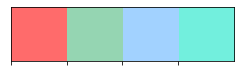

In [ ]:
sns.palplot(sns.color_palette(custom_colors),size=1)

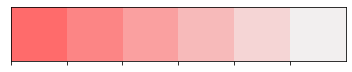

In [ ]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

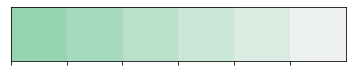

In [ ]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

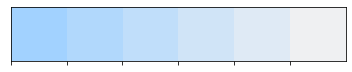

In [ ]:
prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

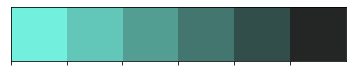

In [ ]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading all the needed excel files from the drive
amazon = pd.read_excel('/content/drive/MyDrive/amazon_prime_eited.xlsx')
netflix = pd.read_excel('/content/drive/MyDrive/netflix_dataset_edited.xlsx')
hotstar = pd.read_excel('/content/drive/MyDrive/disney_plus_Edited.xlsx')
hulu = pd.read_excel('/content/drive/MyDrive/hulu_edited.xlsx')

In [ ]:
#Merge all the datasets into a single one
dataset = pd.concat([amazon, netflix, hotstar, hulu])
dataset.head()

,OTT,type,rating,title,year,runtime,genre,description
0,AMAZON,Movie,NaN,The Grand Seduction,2014,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,AMAZON,Movie,13,Take Care Good Night,2018,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,AMAZON,Movie,NaN,Secrets of Deception,2017,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,AMAZON,Movie,NaN,Pink: Staying True,2014,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,AMAZON,Movie,NaN,Monster Maker,1989,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
dataset.shape

(22540, 8)

In [ ]:
dataset.isnull().sum()

OTT               0
type             98
rating         1111
title            98
year             98
runtime         636
genre           107
description     130
dtype: int64

In [ ]:
list(dataset.columns)

['OTT', 'type', 'rating', 'title', 'year', 'runtime', 'genre', 'description']

In [ ]:
dataset = dataset.dropna(subset=['rating'])
dataset.isnull().sum()

OTT              0
type             0
rating           0
title            0
year             0
runtime        386
genre            0
description      6
dtype: int64

In [ ]:
dataset.index=[i for i in range(0, len(dataset.values))]
dataset

,OTT,type,rating,title,year,runtime,genre,description
0,AMAZON,Movie,13,Take Care Good Night,2018,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
1,AMAZON,Movie,13,Zoombies,2016,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
2,AMAZON,TV Show,ALL,Zoo Babies,2008,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
3,AMAZON,TV Show,18,Zoë Coombs Marr: Bossy Bottom,2020,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
4,AMAZON,Movie,R,Zoe,2018,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...
...,...,...,...,...,...,...,...,...
21424,HULU,TV Show,TV-PG,Star Trek: The Original Series,1966,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
21425,HULU,TV Show,TV-PG,Star Trek: Voyager,1997,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
21426,HULU,TV Show,TV-14,The Fades,2011,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
21427,HULU,TV Show,TV-PG,The Twilight Zone,1959,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sw = stopwords.words('english')
def rep(text):
  for c in '\\`"*_{}[]()>#+-.,!$':
      text = str(text).replace(c, "")
  return text

In [ ]:
for i in range(0,21133):
  doc=rep(dataset["description"][i]).lower().split()
  ans = set(i for i in doc if i not in sw)
  finalAns = ' '.join(ans)
  dataset=dataset.replace(dataset["description"][i], finalAns)
#replace the complete description in the table with finalAns

In [ ]:
for i in range(0,21133):
  doc_genre=rep(dataset["genre"][i]).lower().split()
  ans_genre = set(i for i in doc_genre if i not in sw)
  finalAns_genre = ' '.join(ans_genre)
  dataset=dataset.replace(dataset["genre"][i], finalAns_genre)
#replace the complete description in the table with finalAns

In [ ]:
# Anything that occurs less than this will be removed.
value_counts = dataset.rating.value_counts()
to_remove = value_counts[value_counts <= 53].index
#print(to_remove)
dataset.replace(to_remove, np.nan, inplace=True)

In [ ]:
dataset

,OTT,type,rating,title,year,runtime,genre,description
0,AMAZON,Movie,13,Take Care Good Night,2018,NaN,drama international,pride decides stability family fight threateni...
1,AMAZON,Movie,13,Zoombies,2016,NaN,horror fiction science,animals must virus park whole turns strange cr...
2,AMAZON,TV Show,ALL,Zoo Babies,2008,NaN,kids special interest,attention heart world kingdom little animal se...
3,AMAZON,TV Show,18,Zoë Coombs Marr: Bossy Bottom,2020,NaN,comedy variety show talk,years zoë hack joyously serious silly comedian...
4,AMAZON,Movie,R,Zoe,2018,NaN,fiction science,love intense human zoe léa emotions confusion ...
...,...,...,...,...,...,...,...,...
21424,HULU,TV Show,TV-PG,Star Trek: The Original Series,1966,NaN,action classics adventure,The 23rd century adventures of Captain James T...
21425,HULU,TV Show,TV-PG,Star Trek: Voyager,1997,7 Seasons,adventure action science fiction,Catapulted into the distant sector of the gala...
21426,HULU,TV Show,TV-14,The Fades,2011,NaN,horror fiction science international,Seventeen-year-old Paul is haunted by apocalyp...
21427,HULU,TV Show,TV-PG,The Twilight Zone,1959,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [ ]:
dataset=dataset.replace({'TV-MA': 17, 'TV-14': 14,'R':17, 'TV-PG':18, 'ALL':1, 'PG-13':13, 'PG':18, 'TV-G':1,'TV-Y7':7, 'TV-Y':1, 'G':1, 'NR':20, 'TV-NR':20})

In [ ]:
dataset.head()

,OTT,type,rating,title,year,runtime,genre,description
0,AMAZON,Movie,13.0,Take Care Good Night,2018,NaN,drama international,pride decides stability family fight threateni...
1,AMAZON,Movie,13.0,Zoombies,2016,NaN,horror fiction science,animals must virus park whole turns strange cr...
2,AMAZON,TV Show,1.0,Zoo Babies,2008,NaN,kids special interest,attention heart world kingdom little animal se...
3,AMAZON,TV Show,18.0,Zoë Coombs Marr: Bossy Bottom,2020,NaN,comedy variety show talk,years zoë hack joyously serious silly comedian...
4,AMAZON,Movie,17.0,Zoe,2018,NaN,fiction science,love intense human zoe léa emotions confusion ...


In [ ]:
Netflix = dataset[dataset.OTT.str.contains('NETFLIX', na=False)]

In [ ]:
Hulu = dataset[dataset.OTT.str.contains('HULU', na=False)]

In [ ]:
Prime_Video = dataset[dataset.OTT.str.contains('AMAZON', na=False)]

In [ ]:
Disney_Plus_Hotstar = dataset[dataset.OTT.str.contains('Disney plus Hotstar', na=False)]

In [ ]:
dataset = dataset[dataset['rating'].notna()]

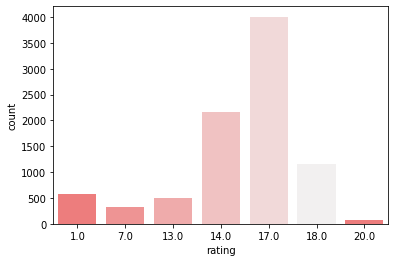

In [ ]:
sns.countplot(x ='rating', data = Netflix, palette = netflix_p)

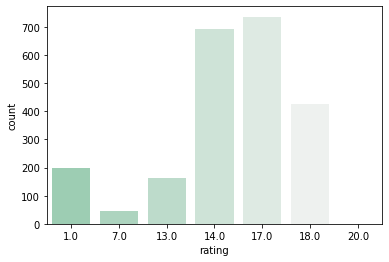

In [ ]:
sns.countplot(x ='rating', data = Hulu, palette = hulu_p)

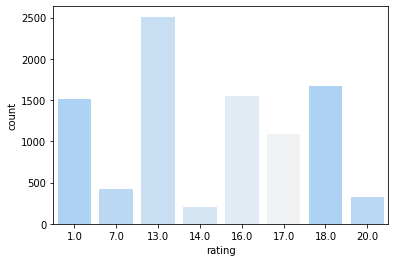

In [ ]:
sns.countplot(x ='rating', data = Prime_Video, palette = prime_p)

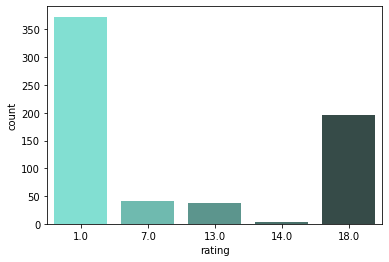

In [ ]:
sns.countplot(x ='rating', data = Disney_Plus_Hotstar, palette = disney_p)

In [ ]:
genres = ""
for i in dataset['genre']: 
  genres += i
  genres += " "

In [ ]:
import nltk
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
lemmatizedGenre = lemmatize_text(genres)
len(lemmatizedGenre)

62973

In [ ]:
uniqueLemmatizedGenre = set(lemmatizedGenre)
len(uniqueLemmatizedGenre)

124

In [ ]:
listUniqueLemmatizedGenre = " ".join(uniqueLemmatizedGenre).split(" ")
listUniqueLemmatizedGenre

['concert',
 'anime',
 'lifestyle',
 'LGBTQ+',
 'Fiction,',
 'movie',
 'Culture',
 'Black',
 'Crime,',
 'reality',
 'talkshow',
 'unscripted',
 '&',
 'spanishlanguage',
 'technology',
 'docuseries',
 'action',
 'faith',
 'fitness',
 'british',
 'sitcom',
 'Adventure,',
 'arthouse',
 'romance',
 'war',
 'game',
 'Reality',
 'lgbtq',
 'Classics,',
 'story',
 'Teen',
 'series',
 'Comedy,',
 'suspense',
 'Cartoons,',
 'video',
 'comedy',
 'Drama,',
 'cartoon',
 'latino',
 'Romance',
 'show',
 'thriller',
 'late',
 'Adult',
 'biography',
 'classic',
 'black',
 'documentary',
 'Sketch',
 'interest',
 'fiction',
 'cooking',
 'health',
 'scifi',
 'wellness',
 'korean',
 'Comedy',
 'special',
 'fantasy',
 'Anime,',
 'Action,',
 "kids'",
 'audience',
 'horror',
 'culture',
 'Science',
 'independent',
 'teen',
 'feature',
 'Horror,',
 'cult',
 'night',
 'History,',
 'Music,',
 'news',
 'International,',
 'adult',
 'gameshow',
 'nature',
 'Lifestyle',
 'sketch',
 'History',
 'musical',
 'mystery',

In [ ]:
dataset['text_lemmatized'] = dataset.genre.apply(lemmatize_text)

In [ ]:
dataset

,OTT,type,rating,title,year,runtime,genre,description,text_lemmatized
0,AMAZON,Movie,13.0,Take Care Good Night,2018,NaN,drama international,pride decides stability family fight threateni...,"[drama, international]"
1,AMAZON,Movie,13.0,Zoombies,2016,NaN,horror fiction science,animals must virus park whole turns strange cr...,"[horror, fiction, science]"
2,AMAZON,TV Show,1.0,Zoo Babies,2008,NaN,kids special interest,attention heart world kingdom little animal se...,"[kid, special, interest]"
3,AMAZON,TV Show,18.0,Zoë Coombs Marr: Bossy Bottom,2020,NaN,comedy variety show talk,years zoë hack joyously serious silly comedian...,"[comedy, variety, show, talk]"
4,AMAZON,Movie,17.0,Zoe,2018,NaN,fiction science,love intense human zoe léa emotions confusion ...,"[fiction, science]"
...,...,...,...,...,...,...,...,...,...
21424,HULU,TV Show,18.0,Star Trek: The Original Series,1966,NaN,action classics adventure,The 23rd century adventures of Captain James T...,"[action, classic, adventure]"
21425,HULU,TV Show,18.0,Star Trek: Voyager,1997,7 Seasons,adventure action science fiction,Catapulted into the distant sector of the gala...,"[adventure, action, science, fiction]"
21426,HULU,TV Show,14.0,The Fades,2011,NaN,horror fiction science international,Seventeen-year-old Paul is haunted by apocalyp...,"[horror, fiction, science, international]"
21427,HULU,TV Show,18.0,The Twilight Zone,1959,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,"[Classics,, Science, Fiction,, Thriller]"


In [ ]:
Final1 = dataset

In [ ]:
Xnew = pd.DataFrame(dataset.iloc[:, [6,7,2]])

In [ ]:
Xnew

,genre,description,rating
0,drama international,pride decides stability family fight threateni...,13.0
1,horror fiction science,animals must virus park whole turns strange cr...,13.0
2,kids special interest,attention heart world kingdom little animal se...,1.0
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0
4,fiction science,love intense human zoe léa emotions confusion ...,17.0
...,...,...,...
21424,action classics adventure,The 23rd century adventures of Captain James T...,18.0
21425,adventure action science fiction,Catapulted into the distant sector of the gala...,18.0
21426,horror fiction science international,Seventeen-year-old Paul is haunted by apocalyp...,14.0
21427,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,18.0


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
one_hot_genre = MultiLabelBinarizer()
one_hot_genre.fit_transform(dataset.text_lemmatized)
print(one_hot_genre.classes_)

['&' 'Action,' 'Adult' 'Adventure,' 'Animation' 'Animation,' 'Anime,'
 'Black' 'Cartoons,' 'Classics,' 'Comedy' 'Comedy,' 'Crime,' 'Culture'
 'Drama,' 'Family,' 'Fiction' 'Fiction,' 'History' 'History,' 'Horror,'
 'International' 'International,' 'Kids' 'Kids,' 'LGBTQ+' 'Latino'
 'Lifestyle' 'Music,' 'Mystery' 'Reality' 'Romance' 'Science' 'Sketch'
 'Stories,' 'Teen' 'Thriller' 'action' 'adult' 'adventure' 'animation'
 'anime' 'art' 'arthouse' 'audience' 'biography' 'black' 'british'
 'cartoon' 'child' 'classic' 'comedy' 'concert' 'cooking' 'crime' 'cult'
 'culture' 'documentary' 'docuseries' 'drama' 'entertainment' 'faith'
 'family' 'fantasy' 'feature' 'fiction' 'fitness' 'food' 'game' 'gameshow'
 'health' 'historical' 'history' 'horror' 'independent' 'interest'
 'international' 'kid' "kids'" 'korean' 'late' 'latino' 'lgbtq'
 'lifestyle' 'military' 'movie' 'music' 'musical' 'mystery' 'nature'
 'news' 'night' 'reality' 'realitytv' 'romance' 'romantic' 'science'
 'scifi' 'series' 'short

In [ ]:
new_col_names = ["%s" %c for c in one_hot_genre.classes_]

# Create new DataFrame with transformed/one-hot encoded text_lemmatized
genreNewCol = pd.DataFrame(one_hot_genre.fit_transform(dataset['text_lemmatized']), columns=new_col_names)

# Concat with original `genre` column
Xnew = pd.concat([Xnew, genreNewCol], axis=1)

In [ ]:
Xnew

,genre,description,rating,&,"Action,",Adult,"Adventure,",Animation,"Animation,","Anime,",...,teen,thriller,tv,unscripted,variety,video,war,wellness,western,young
0,drama international,pride decides stability family fight threateni...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,horror fiction science,animals must virus park whole turns strange cr...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,kids special interest,attention heart world kingdom little animal se...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,fiction science,love intense human zoe léa emotions confusion ...,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21424,action classics adventure,The 23rd century adventures of Captain James T...,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21425,adventure action science fiction,Catapulted into the distant sector of the gala...,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21426,horror fiction science international,Seventeen-year-old Paul is haunted by apocalyp...,14.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21427,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xnew = Xnew.drop(['&'], axis = 1)

In [ ]:
Xnew.shape

(21429, 126)

In [ ]:
Xnew = Xnew.dropna(subset=['rating'])
Xnew.isnull().sum()

genre          0
description    0
rating         0
Action,        0
Adult          0
              ..
video          0
war            0
wellness       0
western        0
young          0
Length: 126, dtype: int64

In [ ]:
Xnew["For Kids"] = Xnew["rating"].apply(lambda x: 1 if int(x) < 13 else 0)

In [ ]:
Xnew.head()

,genre,description,rating,"Action,",Adult,"Adventure,",Animation,"Animation,","Anime,",Black,...,thriller,tv,unscripted,variety,video,war,wellness,western,young,For Kids
0,drama international,pride decides stability family fight threateni...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,horror fiction science,animals must virus park whole turns strange cr...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,kids special interest,attention heart world kingdom little animal se...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,fiction science,love intense human zoe léa emotions confusion ...,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(Xnew.rating.value_counts())

17.0    5829
18.0    3437
13.0    3200
14.0    3063
1.0     2654
16.0    1548
7.0      845
20.0     409
Name: rating, dtype: int64


In [ ]:
print(Xnew['For Kids'].value_counts())

0    17486
1     3499
Name: For Kids, dtype: int64


Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
Xnew['score'] = Xnew['description'].apply(lambda review:sid.polarity_scores(review))
Xnew.head()

,genre,description,rating,"Action,",Adult,"Adventure,",Animation,"Animation,","Anime,",Black,...,tv,unscripted,variety,video,war,wellness,western,young,For Kids,score
0,drama international,pride decides stability family fight threateni...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"{'neg': 0.56, 'neu': 0.298, 'pos': 0.143, 'com..."
1,horror fiction science,animals must virus park whole turns strange cr...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"{'neg': 0.193, 'neu': 0.725, 'pos': 0.082, 'co..."
2,kids special interest,attention heart world kingdom little animal se...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp..."
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"{'neg': 0.024, 'neu': 0.506, 'pos': 0.47, 'com..."
4,fiction science,love intense human zoe léa emotions confusion ...,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"{'neg': 0.234, 'neu': 0.417, 'pos': 0.349, 'co..."


In [ ]:
Xnew['compound'] = Xnew['score'].apply(lambda score_dict: score_dict['compound'])
Xnew.head()

,genre,description,rating,"Action,",Adult,"Adventure,",Animation,"Animation,","Anime,",Black,...,unscripted,variety,video,war,wellness,western,young,For Kids,score,compound
0,drama international,pride decides stability family fight threateni...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"{'neg': 0.56, 'neu': 0.298, 'pos': 0.143, 'com...",-0.7906
1,horror fiction science,animals must virus park whole turns strange cr...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"{'neg': 0.193, 'neu': 0.725, 'pos': 0.082, 'co...",-0.3182
2,kids special interest,attention heart world kingdom little animal se...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.9317
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,"{'neg': 0.024, 'neu': 0.506, 'pos': 0.47, 'com...",0.9744
4,fiction science,love intense human zoe léa emotions confusion ...,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"{'neg': 0.234, 'neu': 0.417, 'pos': 0.349, 'co...",0.7003


In [ ]:
Xnew['score_genre'] = Xnew['genre'].apply(lambda review:sid.polarity_scores(review))
Xnew.head()

,genre,description,rating,"Action,",Adult,"Adventure,",Animation,"Animation,","Anime,",Black,...,variety,video,war,wellness,western,young,For Kids,score,compound,score_genre
0,drama international,pride decides stability family fight threateni...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"{'neg': 0.56, 'neu': 0.298, 'pos': 0.143, 'com...",-0.7906,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,horror fiction science,animals must virus park whole turns strange cr...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"{'neg': 0.193, 'neu': 0.725, 'pos': 0.082, 'co...",-0.3182,"{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp..."
2,kids special interest,attention heart world kingdom little animal se...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.9317,"{'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'comp..."
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,"{'neg': 0.024, 'neu': 0.506, 'pos': 0.47, 'com...",0.9744,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp..."
4,fiction science,love intense human zoe léa emotions confusion ...,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"{'neg': 0.234, 'neu': 0.417, 'pos': 0.349, 'co...",0.7003,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
Xnew['compGenre'] = Xnew['score_genre'].apply(lambda score_dict1: score_dict1['compound'])
Xnew.head()

,genre,description,rating,"Action,",Adult,"Adventure,",Animation,"Animation,","Anime,",Black,...,video,war,wellness,western,young,For Kids,score,compound,score_genre,compGenre
0,drama international,pride decides stability family fight threateni...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"{'neg': 0.56, 'neu': 0.298, 'pos': 0.143, 'com...",-0.7906,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,horror fiction science,animals must virus park whole turns strange cr...,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"{'neg': 0.193, 'neu': 0.725, 'pos': 0.082, 'co...",-0.3182,"{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...",-0.5719
2,kids special interest,attention heart world kingdom little animal se...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.9317,"{'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'comp...",0.6908
3,comedy variety show talk,years zoë hack joyously serious silly comedian...,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"{'neg': 0.024, 'neu': 0.506, 'pos': 0.47, 'com...",0.9744,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.3612
4,fiction science,love intense human zoe léa emotions confusion ...,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,"{'neg': 0.234, 'neu': 0.417, 'pos': 0.349, 'co...",0.7003,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
final = Xnew["For Kids"]

In [ ]:
finaldataset = dataset.join(final)
finaldataset

,OTT,type,rating,title,year,runtime,genre,description,text_lemmatized,For Kids
0,AMAZON,Movie,13.0,Take Care Good Night,2018,NaN,drama international,pride decides stability family fight threateni...,"[drama, international]",0
1,AMAZON,Movie,13.0,Zoombies,2016,NaN,horror fiction science,animals must virus park whole turns strange cr...,"[horror, fiction, science]",0
2,AMAZON,TV Show,1.0,Zoo Babies,2008,NaN,kids special interest,attention heart world kingdom little animal se...,"[kid, special, interest]",1
3,AMAZON,TV Show,18.0,Zoë Coombs Marr: Bossy Bottom,2020,NaN,comedy variety show talk,years zoë hack joyously serious silly comedian...,"[comedy, variety, show, talk]",0
4,AMAZON,Movie,17.0,Zoe,2018,NaN,fiction science,love intense human zoe léa emotions confusion ...,"[fiction, science]",0
...,...,...,...,...,...,...,...,...,...,...
21424,HULU,TV Show,18.0,Star Trek: The Original Series,1966,NaN,action classics adventure,The 23rd century adventures of Captain James T...,"[action, classic, adventure]",0
21425,HULU,TV Show,18.0,Star Trek: Voyager,1997,7 Seasons,adventure action science fiction,Catapulted into the distant sector of the gala...,"[adventure, action, science, fiction]",0
21426,HULU,TV Show,14.0,The Fades,2011,NaN,horror fiction science international,Seventeen-year-old Paul is haunted by apocalyp...,"[horror, fiction, science, international]",0
21427,HULU,TV Show,18.0,The Twilight Zone,1959,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,"[Classics,, Science, Fiction,, Thriller]",0


Building Model

In [ ]:
X = Xnew.iloc[:, 3:124].values

In [ ]:
#train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Xnew['For Kids'], test_size=0.3, random_state=9)

In [ ]:
# Linear Regression

lineareg = LinearRegression()
lineareg.fit(xtrain, ytrain)
Y_pred = lineareg.predict(xtest)
acc_linear = round(lineareg.score(xtrain, ytrain) * 100, 2)
acc_linear


47.78

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
Y_pred = logreg.predict(xtest)
acc_log = round(logreg.score(xtrain, ytrain) * 100, 2)
acc_log

91.13

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(xtrain, ytrain)
Y_pred = svc.predict(xtest)
acc_svc = round(svc.score(xtrain, ytrain) * 100, 2)
acc_svc

92.12

In [ ]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(xtrain, ytrain)
Y_pred = knn.predict(xtest)
acc_knn = round(knn.score(xtrain, ytrain) * 100, 2)
acc_knn

91.2

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(xtrain, ytrain)
Y_pred = gaussian.predict(xtest)
acc_gaussian = round(gaussian.score(xtrain, ytrain) * 100, 2)
acc_gaussian

34.24

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(xtrain, ytrain)
Y_pred = perceptron.predict(xtest)
acc_perceptron = round(perceptron.score(xtrain, ytrain) * 100, 2)
acc_perceptron

89.76

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(xtrain, ytrain)
Y_pred = linear_svc.predict(xtest)
acc_linear_svc = round(linear_svc.score(xtrain, ytrain) * 100, 2)
acc_linear_svc

90.78

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
Y_pred = sgd.predict(xtest)
acc_sgd = round(sgd.score(xtrain, ytrain) * 100, 2)
acc_sgd

90.48

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
Y_pred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(xtrain, ytrain) * 100, 2)
acc_decision_tree

92.43

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xtrain, ytrain)
Y_pred = random_forest.predict(xtest)
random_forest.score(xtrain, ytrain)
acc_random_forest = round(random_forest.score(xtrain, ytrain) * 100, 2)
acc_random_forest

92.43

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Linear Regression', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_linear, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,92.43
9,Decision Tree,92.43
0,Support Vector Machines,92.12
1,KNN,91.20
3,Logistic Regression,91.13
8,Linear SVC,90.78
7,Stochastic Gradient Decent,90.48
6,Perceptron,89.76
2,Linear Regression,47.78
5,Naive Bayes,34.24


In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear, acc_knn, acc_log, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,92.43
1,KNN,91.20
2,Logistic Regression,91.13
0,Linear Regression,47.78
3,Naive Bayes,34.24
